In [41]:
#  Import libraries
from __future__ import print_function, absolute_import, division, unicode_literals

import numpy as np
import glob, os, sys
import fileinput
from astropy.io import fits
import matplotlib.pyplot as plt

from astropy.stats import sigma_clip
from datetime import datetime
import warnings

# Bias Frames

In [3]:
cd DATA

C:\Users\Adiputra\siuling\UCSC\136\DATA


In [4]:
files_bias = [f for f in os.listdir('BIAS') if f.endswith('.fits')]


In [5]:
cd BIAS

C:\Users\Adiputra\siuling\UCSC\136\DATA\BIAS


In [6]:
bias_data = []

for i in range(len(files_bias)):
    hdu_bias = fits.open(files_bias[i])
    if not hdu_bias[0].header['EXPTIME']:
        clip_bias = sigma_clip(hdu_bias[0].data)
        bias_data.append(clip_bias)
        
bias_masks = [arr.mask for arr in bias_data] # Get masks for each image
final_bias = np.ma.masked_array(data=np.dstack(bias_data), mask=np.dstack(bias_masks)) # Create stacked masked array

In [ ]:
(final_bias).shape

In [ ]:
bias_data

In [ ]:
final_bias[:,:,0]

In [ ]:
plt.imshow(bias_data[0])
plt.colorbar()
type(bias_data[4])

In [ ]:
plt.imshow(final_bias[:,:,0])
plt.colorbar()
type(final_bias[:,:,0])

Find stats of bias

In [ ]:
bias_mean = np.mean(biasdata, axis=2, keepdims=True)
bias_median = np.median(biasdata, axis=2, keepdims=True)
bias_std = np.std(biasdata, axis=2, keepdims=True)

Sigma clip bias data

#### Create Master Bias

In [7]:
master_bias = np.mean(bias_data)

In [8]:
master_bias = np.mean(final_bias, axis=2)

In [9]:
master_bias.shape

(510, 765)

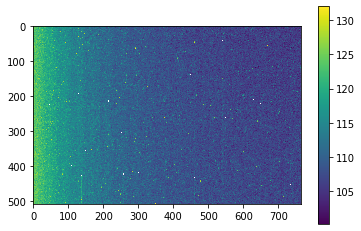

In [10]:
plt.imshow(master_bias)
plt.colorbar()

# Dark Files

In [ ]:
pwd

In [11]:
cd ..

C:\Users\Adiputra\siuling\UCSC\136\DATA


In [12]:
files_dark = [f for f in os.listdir('DARK') if f.endswith('.fits')]


In [13]:
cd DARK

C:\Users\Adiputra\siuling\UCSC\136\DATA\DARK


In [14]:
dark_data = []
for i in range(len(files_dark)):
    hdu_dark = fits.open(files_dark[i])
    if hdu_dark[0].header['EXPTIME'] > 0:
        correct_dark = (hdu_dark[0].data - master_bias)/hdu_dark[0].header['EXPTIME']
        clip_dark = sigma_clip(hdu_dark[0].data)
        dark_data.append(clip_dark)
        
dark_masks = [arr.mask for arr in dark_data] # Get masks for each image
final_dark = np.ma.masked_array(data=np.dstack(dark_data), mask=np.dstack(dark_masks)) # Create stacked masked array

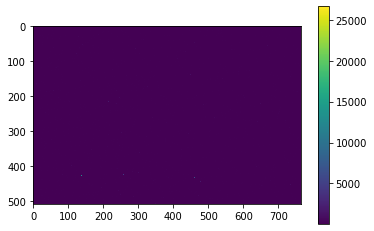

In [103]:
#raw dark
plt.imshow(hdu_dark[0].data)
plt.colorbar()

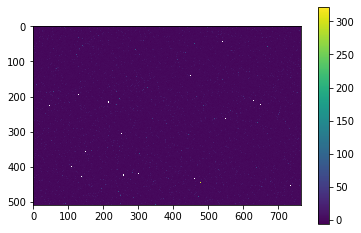

In [98]:
#corrected dark
plt.imshow(correct_dark)
plt.colorbar()

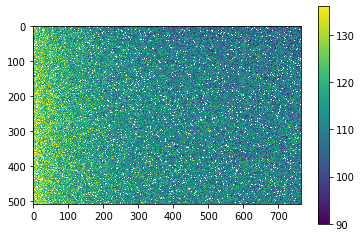

In [104]:
#clipped dark
plt.imshow(clip_dark)
plt.colorbar()

Find stats for darks

In [ ]:
dark_mean = np.mean(darkdata, axis=2, keepdims=True)
dark_median = np.median(darkdata, axis=2, keepdims=True)
dark_std = np.std(darkdata, axis=2, keepdims=True)

### Create master dark

In [16]:
master_dark = np.mean(final_dark, axis=2)

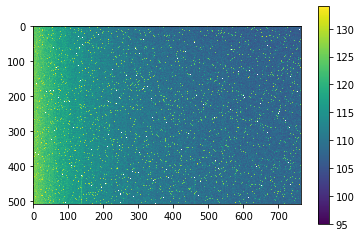

In [17]:
plt.imshow(master_dark)
plt.colorbar()

# Flat Frames

In [18]:
cd ..

C:\Users\Adiputra\siuling\UCSC\136\DATA


In [19]:
files_flat = [f for f in os.listdir('FLAT') if f.endswith('.fits')]

In [20]:
cd FLAT

C:\Users\Adiputra\siuling\UCSC\136\DATA\FLAT


In [22]:
flatdata = []
for i in range(len(files_flat)):
    hdu_flat = fits.open(files_flat[i])
    if hdu_flat[0].header['EXPTIME'] > 0:
        if hdu_flat[0].header['APTDIA'] > 0:
            #correct the flat
            correct_flat = (((hdu_flat[0].data - master_bias)/hdu_flat[0].header['EXPTIME']) - master_dark)
            #clip flat
            clip_flat = sigma_clip(correct_flat)
            #find the minimum of the flat for normalization
            min_flat = np.min(clip_flat)
            #normalize flat
            norm_flat = clip_flat/min_flat
            #add flat to the list flatdata
            flatdata.append(norm_flat)
            
flat_masks = [arr.mask for arr in flatdata] # Get masks for each image
final_flat = np.ma.masked_array(data=np.dstack(flatdata), mask=np.dstack(flat_masks)) # Create stacked masked array
            

In [ ]:
flat_mean = np.mean(flatdata, axis=2, keepdims=True)
flat_median = np.median(flatdata, axis=2, keepdims=True)
flat_std = np.std(flatdata, axis=2, keepdims=True)

### Create Master Flat

In [23]:
master_flat = np.mean(final_flat, axis=2)

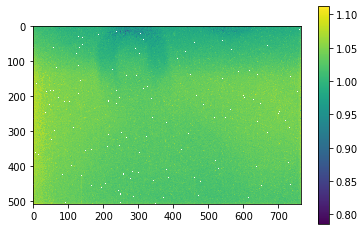

In [24]:
plt.imshow(master_flat)
plt.colorbar()

# Science Frames

In [25]:
cd ..

C:\Users\Adiputra\siuling\UCSC\136\DATA


In [26]:
files_sci = [f for f in os.listdir('TWI_SKY') if f.endswith('.fits')]

In [27]:
cd TWI_SKY

C:\Users\Adiputra\siuling\UCSC\136\DATA\TWI_SKY


In [62]:
sci_data = []
sci_mean = []
sci_median = []
sci_std = []
obs_t_sci = []

In [97]:
np.mean(master_flat)

1.0274449992173182

In [95]:
fits.open(files_sci[62])[0].header['exptime']

60.0

In [63]:
warnings.filterwarnings("ignore")

for i in range(len(files_sci)):
    hdu_sci = fits.open(files_sci[i])
    header_sci = hdu_sci[0].header
    if header_sci['EXPTIME'] > 0:
        if header_sci['APTDIA'] > 0:
            correct_sci = (((hdu_sci[0].data - master_bias) / header_sci['EXPTIME']) - master_dark) / master_flat
            clip_sci = sigma_clip(correct_sci)
            #mean_sci = np.mean(clip_sci)
            #median_sci = np.median(clip_sci)
            #std_sci = np.std(clip_sci)
            
            sci_data.append(clip_sci)
            #sci_mean.append(mean_sci)
            #sci_median.append(median_sci)
            #sci_std.append(std_sci)
            
            time = header_sci['TIME-OBS']
            obs_t_sci.append(time)   
            
sci_masks = [arr.mask for arr in sci_data] # Get masks for each image
final_sci = np.ma.masked_array(data=np.dstack(sci_data), mask=np.dstack(sci_masks)) # Create stacked masked array

# Seems like my master dark is too big

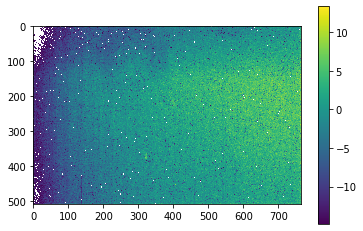

In [88]:
plt.imshow(final_sci[:,:,62]) #oh no
plt.colorbar()

### Calculate Stats

In [64]:
for i in range(final_sci.shape[2]):
    mean = np.mean(final_sci[:,:,i])
    median = np.median(final_sci[:,:,i])
    std = np.std(final_sci[:,:,i])
    
    sci_mean.append(mean)
    sci_median.append(median)
    sci_std.append(std)

In [83]:
sci_mean

[17313.314524141475,
 18550.093794064764,
 18402.71547605164,
 18385.416822072406,
 17809.121452558524,
 18866.779926529867,
 20053.81884728185,
 19180.60645489618,
 17154.348125852302,
 16223.590585372858,
 9125.300336989949,
 9023.085548018575,
 8893.344162238169,
 8765.002204346416,
 8632.006902756362,
 8502.171093329136,
 8373.301247567066,
 8250.640394689039,
 8127.065710465389,
 8006.5371069284465,
 4804.438793947526,
 4721.273229293668,
 4624.152991916557,
 4525.874405927145,
 4530.667248138727,
 4440.041967944754,
 4384.762110729605,
 4206.260753347244,
 4134.637841067286,
 4077.7731418260614,
 1982.9992180076329,
 1927.580546210988,
 1868.7831428052623,
 1809.8470022087558,
 1754.0536859158995,
 1697.6552148215737,
 1643.8874816714185,
 1592.453859281418,
 1541.7364837278903,
 1491.2711678909886,
 877.7015611350157,
 833.5559166146602,
 788.5304178525456,
 745.049886965596,
 703.5897561098415,
 664.23275126757,
 625.896280812355,
 590.350567913024,
 555.8587550172571,
 523.422

### Change OBS-TIME to secs

In [67]:
seconds = []
for i in range(len(obs_t_sci)):
    dt = datetime.strptime(obs_t_sci[i], '%H:%M:%S.%f')
    total_seconds = dt.second + dt.minute*60 + dt.hour*3600
    seconds.append(total_seconds)

print(seconds)

[10513, 10516, 10519, 10522, 10526, 10529, 10532, 10535, 10538, 10542, 10702, 10706, 10710, 10714, 10718, 10723, 10727, 10731, 10735, 10739, 10873, 10878, 10884, 10889, 10895, 10900, 10906, 10911, 10917, 10922, 11088, 11096, 11103, 11111, 11118, 11126, 11133, 11141, 11148, 11156, 11273, 11285, 11298, 11310, 11323, 11335, 11348, 11360, 11373, 11385, 11415, 11437, 11460, 11482, 11505, 11527, 11550, 11572, 11595, 11617, 11677, 11740, 11802, 11865, 11927, 12039, 12222]


# Plot counts vs. time

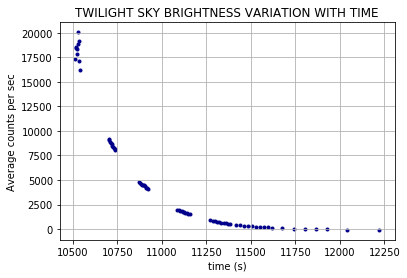

In [68]:


plt.xlabel('time (s)') 
plt.ylabel('Average counts per sec') 
plt.title('TWILIGHT SKY BRIGHTNESS VARIATION WITH TIME')
plt.scatter(seconds, sci_mean, label="projected" , color = 'darkblue', marker='.')
plt.grid()
plt.show()

### Linearize data

In [38]:
(sci_mean)

[17313.314524141475,
 18550.093794064764,
 18402.71547605164,
 18385.416822072406,
 17809.121452558524,
 18866.779926529867,
 20053.81884728185,
 19180.60645489618,
 17154.348125852302,
 16223.590585372858,
 9125.300336989949,
 9023.085548018575,
 8893.344162238169,
 8765.002204346416,
 8632.006902756362,
 8502.171093329136,
 8373.301247567066,
 8250.640394689039,
 8127.065710465389,
 8006.5371069284465,
 4804.438793947526,
 4721.273229293668,
 4624.152991916557,
 4525.874405927145,
 4530.667248138727,
 4440.041967944754,
 4384.762110729605,
 4206.260753347244,
 4134.637841067286,
 4077.7731418260614,
 1982.9992180076329,
 1927.580546210988,
 1868.7831428052623,
 1809.8470022087558,
 1754.0536859158995,
 1697.6552148215737,
 1643.8874816714185,
 1592.453859281418,
 1541.7364837278903,
 1491.2711678909886,
 877.7015611350157,
 833.5559166146602,
 788.5304178525456,
 745.049886965596,
 703.5897561098415,
 664.23275126757,
 625.896280812355,
 590.350567913024,
 555.8587550172571,
 523.422

In [69]:
y = np.log(sci_mean)
m, b = np.polyfit(seconds, y, 1)

LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
# Linear function:
def func(x,m,b):
    f = []
    for i in x:
        y = m*i + b
        f.append(y)
    return f

In [ ]:
y_fit = func(seconds,m,b)

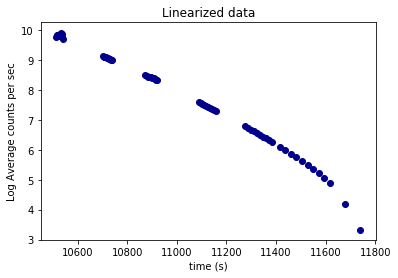

In [70]:
plt.xlabel('time (s)') 
plt.ylabel('Log Average counts per sec') 
plt.title('Linearized data')
plt.scatter(seconds, y, label="projected" , color = 'darkblue')
#plt.plot(seconds, y_fit)
#plt.savefig("Pau-Sanchez_Sky_Bri.pdf")


### Fit a line

In [ ]:
dpsi_dt = m/(-6.1*0.20944)

In [ ]:
dpsi_dt*1440